####Density Dimensions
* Author : Sabari Murugan S
* GitHub : https://github.com/sabarimurugans47
* License: Educational use only. Please credit if reused.

####Univariate Normal Density

In [143]:
import pandas as pd,seaborn as sns,numpy as np,matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Data creation

In [144]:
df=[1.0,2.0,3.5,4.0,4.5,4.6,5.1,5.2,5.4,5.4,6.0,7.0,8.3,9.1,10.0]
df

[1.0, 2.0, 3.5, 4.0, 4.5, 4.6, 5.1, 5.2, 5.4, 5.4, 6.0, 7.0, 8.3, 9.1, 10.0]

#### KDE plot to interpret the distributions

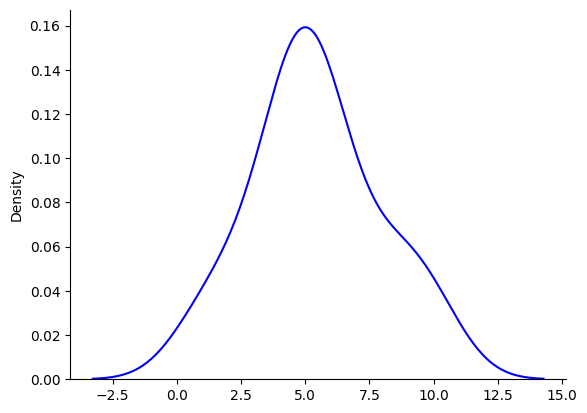

In [178]:
sns.kdeplot(df, fill=False, color="blue")
sns.despine()
plt.show()

In [146]:
sigma=np.std(df)
mu=np.mean(df)

In [147]:
sigma,mu

(np.float64(2.369941396368742), np.float64(5.406666666666666))

In [148]:
22/7 # π-value (approximation)

3.142857142857143

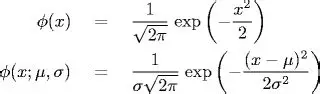
* x - samples
* μ - mean
* π - approximation (π - 22/7)
* σ - Standard deviation
* σ^2 - Variance

In [149]:
def prob(x):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

In [150]:
prob(4.53)

np.float64(0.15720246451357342)

#### It representing , where the sample lies on the distribution.If higher it is closer to mean.If lower it is far away from mean

#### Multivariate Gaussian Function

In [151]:
x1=[12,15,20,18]
x2=[40,35,50,45]
x3=[22,30,28,24]
df2=pd.DataFrame({
    'x1':x1,
    'x2':x2,
    'x3':x3},index=['A','B','C','D'])
df2

,x1,x2,x3
A,12,40,22
B,15,35,30
C,20,50,28
D,18,45,24


In [152]:
μ_1=np.mean(df2['x1'])
μ_2=np.mean(df2['x2'])
μ_3=np.mean(df2['x3'])
μ_1,μ_2,μ_3

(np.float64(16.25), np.float64(42.5), np.float64(26.0))

#### Centering the data

In [153]:
df2['x1']=df2['x1']-μ_1
df2['x2']=df2['x2']-μ_2
df2['x3']=df2['x3']-μ_3

In [154]:
df2

,x1,x2,x3
A,-4.25,-2.5,-4.0
B,-1.25,-7.5,4.0
C,3.75,7.5,2.0
D,1.75,2.5,-2.0


#### KDE plot

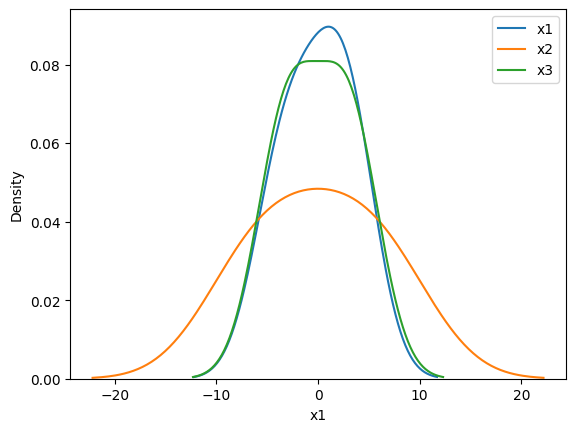

In [179]:
for col in df2.columns:
    sns.kdeplot(df2[col], label=col)
plt.legend()
plt.show()

In [155]:
S=1/3*(df2.T @ df2)
S

,x1,x2,x3
x1,12.250000,17.500000,5.333333
x2,17.500000,41.666667,-3.333333
x3,5.333333,-3.333333,13.333333


In [156]:
det_S=np.linalg.det(S)

In [157]:
det_S

np.float64(778.7037037037034)

In [158]:
minors=np.array([[544.44,251.11,-280.55],
                 [251.11,134.88,-134.16],
                 [-280.55,-134.16,204.16]])
minors

array([[ 544.44,  251.11, -280.55],
       [ 251.11,  134.88, -134.16],
       [-280.55, -134.16,  204.16]])

In [159]:
cofactor_sign=np.array([[544.44,-251.11,-280.55],
                 [-251.11,134.88,-134.16],
                 [-280.55,134.16,204.16]])
cofactor_sign

array([[ 544.44, -251.11, -280.55],
       [-251.11,  134.88, -134.16],
       [-280.55,  134.16,  204.16]])

In [160]:
adjugate=cofactor_sign.T
adjugate

array([[ 544.44, -251.11, -280.55],
       [-251.11,  134.88,  134.16],
       [-280.55, -134.16,  204.16]])

In [161]:
final_inverse_matrix=(1/det_S)*adjugate
final_inverse_matrix

array([[ 0.69916195, -0.32247182, -0.36027824],
       [-0.32247182,  0.17321094,  0.17228633],
       [-0.36027824, -0.17228633,  0.26217931]])

#### Mahalanobis Distance
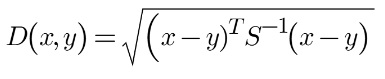
* A Distance metric that shows how unusual a point is relative to a multivariate distribution
* S^-1 is our final_inverse_matrix

In [162]:
# New sample
new_x=[20,46,27]

In [163]:
# Step 1 : Center the samples (xi-μ)
# Recalling our μ-vector
μ_1,μ_2,μ_3

(np.float64(16.25), np.float64(42.5), np.float64(26.0))

In [164]:
scaled_x=[20-μ_1,46-μ_2,27-μ_3]
scaled_x

[np.float64(3.75), np.float64(3.5), np.float64(1.0)]

In [165]:
#Multiply inverse matrix with scaled_x
S_new=final_inverse_matrix @ scaled_x
S_new.T

array([ 1.13292771, -0.43074471, -1.69186623])

In [166]:
m=scaled_x @ S_new
m

np.float64(1.0490061831153392)

In [167]:
Mahalanobis_distance=np.sqrt(m)
Mahalanobis_distance #New sample is mostly near the mean

np.float64(1.0242100288101748)

Mahalanobis Distance = 1.0242
* This tells you how far your new sample (20, 46, 27) is from the center (mean) of your multivariate distribution, measured in “standard deviation units” that account for correlations.
* A value close to 1 means the point is within the main ellipsoid of the data cloud — not at the exact center, but still near the bulk of your distribution.
* If it were much larger (say >3), the point would be considered an outlier.

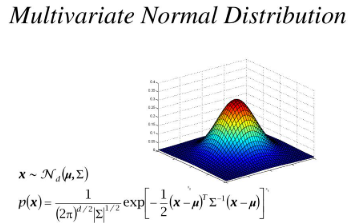
* d - Number of variables

In [168]:
a=(2*np.pi)**1.5

In [169]:
b=np.sqrt(det_S)

In [170]:
c=1/(a*b)
c

np.float64(0.0022753283461114425)

In [174]:
d=np.exp((-0.5)*m)

In [177]:
final_value=c*d
final_value

np.float64(0.001346651685200616)

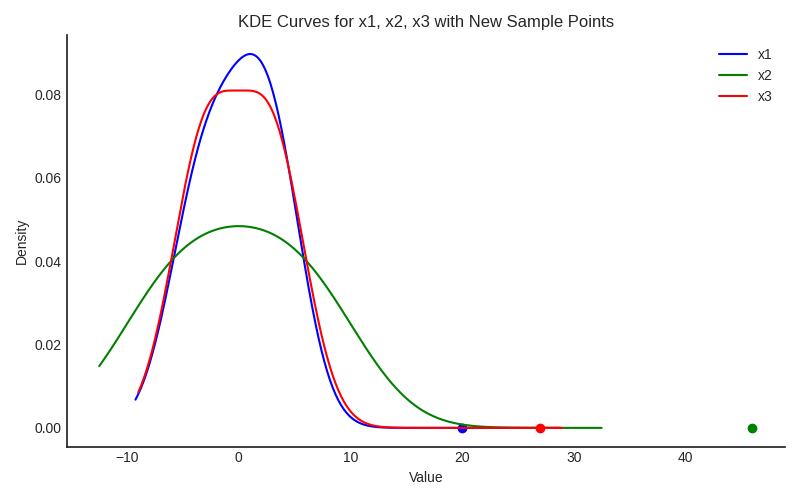

#### Multivariate Density f(x) = 0.001346...
* This is the probability density of your sample under the fitted Gaussian.

* It doesn’t mean “probability” directly, but rather how likely the point is relative to the distribution.

* A small but non‑zero value like this means the point lies in a valid region of the distribution, though not in the highest‑density core.


---

